**непараметрическая регрессия**

Евгений Борисов esborisov@sevsu.ru

# генерируем набор данных

In [1]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(precision=2)

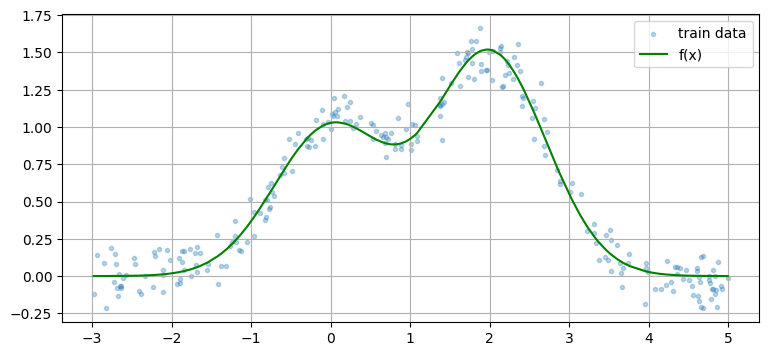

In [3]:
# f,xlim = (lambda x: np.sin(x*2.9)),(-1.,+2.)
# f,xlim = lambda x: np.sin(x*2.9)+np.cos(x*5.9),(-1,1)
f,xlim = lambda x: np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2), (-3,5)

def generate(f, xlim=(-1.,1.), n_samples=256, noise=.1 ):
    assert len(xlim)==2
    assert xlim[0]<xlim[1]
    assert n_samples>2
    assert 0.<noise<1.
    x = np.sort( rng.rand(n_samples)*(xlim[1]-xlim[0]) + xlim[0] )
    return x.reshape(-1,1), ( f(x)+rng.normal(0.,noise,n_samples) ).reshape(-1,1)

X_train,y_train = generate(f=f,xlim=xlim)

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.grid()
ax.legend()

# модель регрессии

In [4]:
# прямоугольное ядро
def kernel_rect(x): return np.abs(x)<=1.0

# треугольное ядро
def kernel_tri(x): return (1.0-np.abs(x))*(np.abs(x)<=1.0)

# квадратичное ядро (Епанечникова)
def kernel_square(x): return (1.0-np.square(x))*(np.abs(x)<=1.0)
    
# гауссово ядро
def kernel_gauss(x): return np.exp(-2.0*np.square(x))

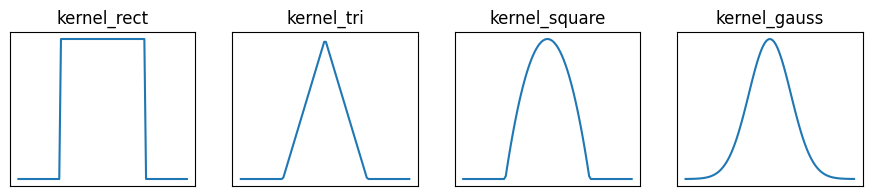

In [5]:
x = np.linspace(-2.,2,100)
kernels = [ kernel_rect,kernel_tri,kernel_square,kernel_gauss ]
fig,ax = plt.subplots(1,len(kernels),figsize=(11,2),sharey=True,sharex=True)
for n,k in enumerate(kernels):
    ax[n].plot(x,k(x))
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(k.__name__)
plt.show()

---

непараметрическая (ядерная) регрессия, формула Надарая-Ватсона

$$ 
a(x,X,y) = \frac 
 { \sum\limits_{i=1}^m y_i K\left(\frac{\rho(x,x_i)}{h}\right) }
 { \sum\limits_{i=1}^m K\left(\frac{\rho(x,x_i)}{h}\right) } 
$$

In [6]:
from sklearn.metrics.pairwise import euclidean_distances as metric

class KernelRegression:
    
    def __init__( self, kernel=kernel_gauss, metric=metric, h=.2 ):
        self._metric = metric
        self._kernel = kernel # ядро влияет на на гладкость аппроксимации
        self._h = h # ширина окна, влияет на точность аппроксимации
        self._X = np.array([])
        self._y = np.array([])
        
    def fit(self,X,y):  
        assert len(X.shape)==2
        assert len(X)==len(y)  
        self._X = X
        self._y = y
        return self

    def predict(self,x):
        assert len(self._X)>1
        assert self._X.shape[1]==x.shape[1]
        d = self._metric( x, self._X )
        w = self._kernel(d/self._h) 
        return (self._y.T*w).sum(axis=1)/w.sum(axis=1) # значение регресии        

In [7]:
model = KernelRegression().fit(X_train,y_train) # обучаем модель

## тестируем

In [8]:
X_test,y_test = generate(f=f,xlim=xlim)
predicted = model.predict(X_test)

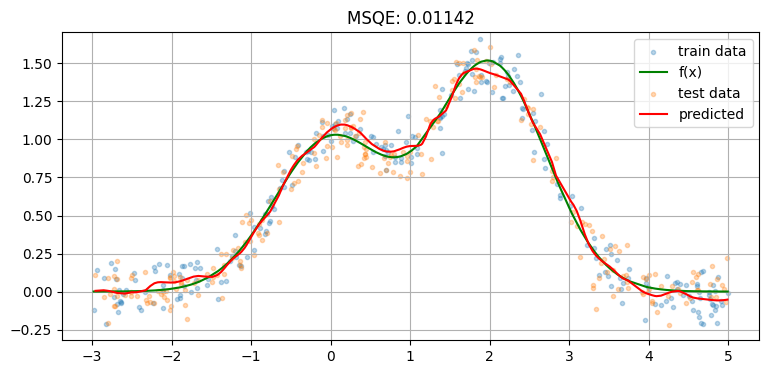

In [9]:
from sklearn.metrics import mean_squared_error

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.scatter(x=X_test,y=y_test,alpha=.3,marker='.',label='test data') # точки учебного набора
ax.plot(X_test,predicted,c='r',label='predicted')
ax.set_title(f'MSQE: {mean_squared_error(y_true=y_test,y_pred=predicted):.5f}')
# ax.set_xlim(X_test.min()-.1,X_test.max()+.1)
ax.set_ylim(y_test.min()-.1,y_test.max()+.1)
ax.grid()
ax.legend()

---

In [ ]:
# !pip3 install watermark

In [10]:
%load_ext watermark
%watermark --python
%watermark --iversions

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.21.0

numpy     : 1.26.4
matplotlib: 3.7.1

